In [1]:
import pandas as pd
import numpy as np
import lib_tools as pt # Import Project Tools

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import date

start_year = 2005
end_year = 2021

# load data into dictionnaries
dic_usagers = pt.load_usagers(start_year, end_year)
dic_caract  = pt.load_caract(start_year, end_year)
dic_vehic   = pt.load_vehicules(start_year, end_year)
dic_lieux   = pt.load_lieux(start_year, end_year)

### Preprocessings to build df_usagers, df_caract, df_vehic, df_lieux

In [2]:
chk = False
df_usagers = pt.preproc_usagers(dic_usagers, chk)
df_caract = pt.preproc_caract(dic_caract, chk)
df_vehic = pt.preproc_vehic(dic_vehic, chk)
df_lieux = pt.preproc_lieux(dic_lieux, chk)

### Merge data into one DataFrame

In [3]:
df_all = pt.merge_dataframes(df_usagers=df_usagers, df_caract=df_caract, df_vehic=df_vehic, df_lieux=df_lieux)

### Check graphically for Null values

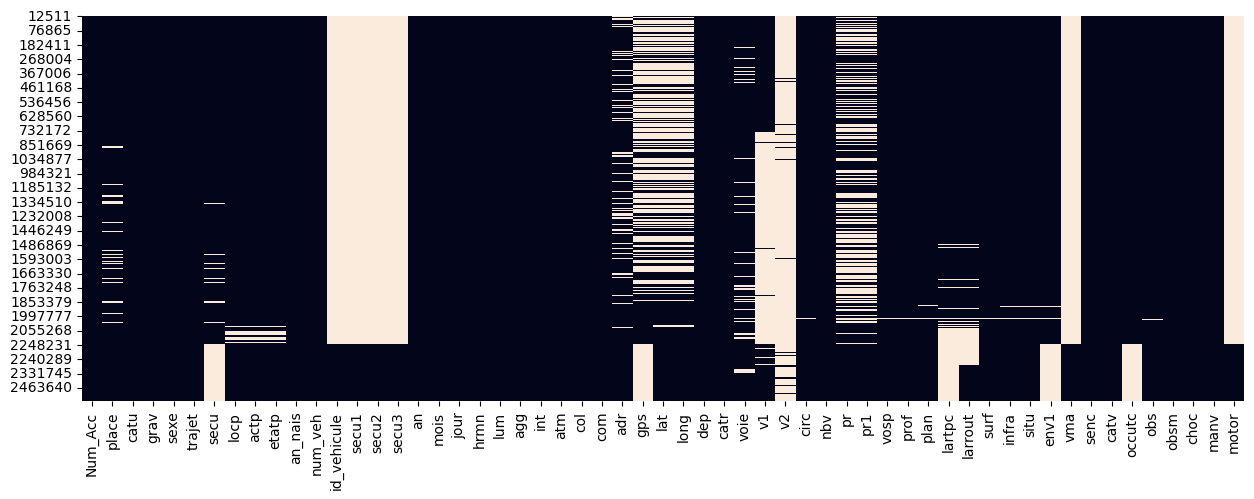

In [8]:
df_sample = df_all.sample(10000)
df_sample = df_sample.sort_values(by=['an', 'mois', 'jour'], ascending=True)

plt.figure(figsize=(15,5))
ax = sns.heatmap(df_sample.isna(), cbar=False);

### Volume des données

In [5]:
# nb de lignes et colonnes de chaque DataFrame

dic = {'caract' : dic_caract, 'lieux' : dic_lieux, 'usagers': dic_usagers, 'vehic' : dic_vehic}

for key in dic.keys() : 
    print(f"\n{key} : \n")
    nb_lin = []
    nb_col = []
   
    for year in range(start_year, end_year+1):
        dic_data = dic[key]
        df = dic_data[year]
        nb_lin.append(df.shape[0])
        nb_col.append(df.shape[1])
        print(f'{key} {year} : {df.shape[1]} colonnes x {df.shape[0]} lignes')

    print(f"\nnombre de lignes min : {min(nb_lin)}")    
    print(f"\nnombre de lignes max : {max(nb_lin)}")    


caract : 

caract 2005 : 16 colonnes x 87026 lignes
caract 2006 : 16 colonnes x 82993 lignes
caract 2007 : 16 colonnes x 83850 lignes
caract 2008 : 16 colonnes x 76767 lignes
caract 2009 : 16 colonnes x 74409 lignes
caract 2010 : 16 colonnes x 69379 lignes
caract 2011 : 16 colonnes x 66974 lignes
caract 2012 : 16 colonnes x 62250 lignes
caract 2013 : 16 colonnes x 58397 lignes
caract 2014 : 16 colonnes x 59854 lignes
caract 2015 : 16 colonnes x 58654 lignes
caract 2016 : 16 colonnes x 59432 lignes
caract 2017 : 16 colonnes x 60701 lignes
caract 2018 : 16 colonnes x 57783 lignes
caract 2019 : 15 colonnes x 58840 lignes
caract 2020 : 15 colonnes x 47744 lignes
caract 2021 : 15 colonnes x 56518 lignes

nombre de lignes min : 47744

nombre de lignes max : 87026

lieux : 

lieux 2005 : 18 colonnes x 87026 lignes
lieux 2006 : 18 colonnes x 82993 lignes
lieux 2007 : 18 colonnes x 83850 lignes
lieux 2008 : 18 colonnes x 76767 lignes
lieux 2009 : 18 colonnes x 74409 lignes
lieux 2010 : 18 colo

### Analyse intercorrelations between variables

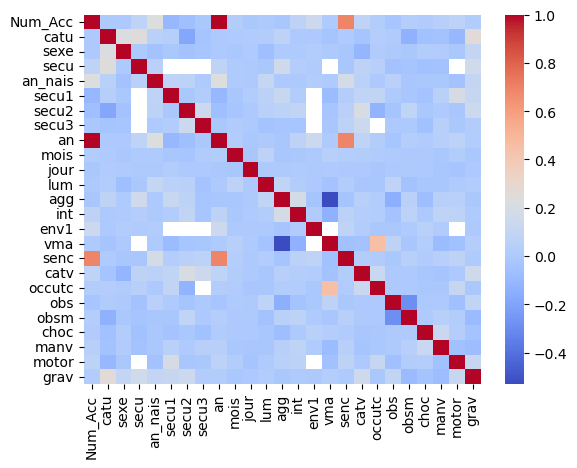

In [6]:
target = df_all['grav']
data = df_all.drop(columns=['grav'], axis=1)
# set 'grav' as last column of data
data['grav'] = target

# data = data.fillna(data.median())
# data_clean = data.dropna(how='any')

data_sample = data.sample(10000)
corr = data_sample.corr()

sns.heatmap(corr, annot=False, cmap='coolwarm');
# sns.clustermap(corr, annot=False, cmap='coolwarm');

### Evolution de gravité 'Blessé hospitalisé' en 2019?

In [7]:
df_usagers_2018 = df_all[df_all.an == 2018]
df_usagers_2019 = df_all[df_all.an == 2019]

# sns.histplot(df_usagers_2018.grav)
# ax = plt.hist([df_usagers_2018.grav, df_usagers_2019.grav], color=['r', 'b'], alpha=0.5)

print("\nDistribution de la variable gravité en 2018 : \n")
print(df_usagers_2018.grav.value_counts(normalize=True))

print("\nDistribution de la variable gravité en 2019 : \n")
print(df_usagers_2019.grav.value_counts(normalize=True))


Distribution de la variable gravité en 2018 : 

1    0.416418
4    0.386983
3    0.170503
2    0.026096
Name: grav, dtype: float64

Distribution de la variable gravité en 2019 : 

1    0.415959
4    0.400795
3    0.156928
2    0.026318
Name: grav, dtype: float64
